In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("runs.csv")
df.head(2)

,steps,energy,magnetization,beta,hot,model
0,0,584,-42,0.0,True,mod_0.0_True
1,1,584,42,0.0,True,mod_0.0_True


In [3]:
df["magnetization_abs"] = np.abs(df["magnetization"])
df.head(2)

,steps,energy,magnetization,beta,hot,model,magnetization_abs
0,0,584,-42,0.0,True,mod_0.0_True,42
1,1,584,42,0.0,True,mod_0.0_True,42


In [4]:
df["magnetization_abs"] = df["magnetization_abs"]/(100*100)
df["energy"] = df["energy"]/(100*100)

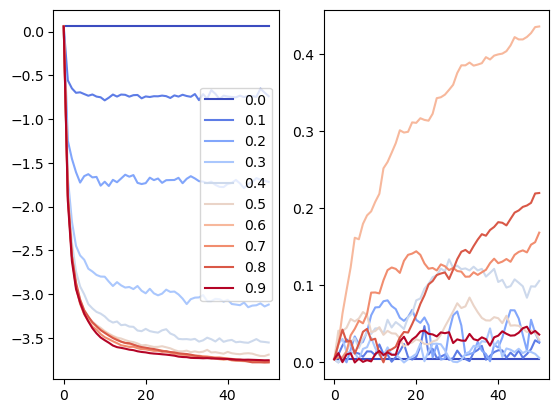

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(6.4, 4.8))

betas = sorted(set(df.beta.value_counts().index))
normalize = plt.Normalize(min(betas), max(betas))
colormap = plt.cm.coolwarm

for beta in betas:
    df_plot = df[df["beta"] == beta]
    df_hot = df_plot[df_plot["hot"]]
    df_hot = df_hot.sort_values(by="steps", ascending=True)
    # df_cold = df_plot[df_plot["hot"]==False]
    
    # Get the color for this beta value using the colormap
    color = colormap(normalize(beta))
    
    # Now use this color for both plots
    ax1.plot(df_hot["steps"], df_hot["energy"], label=f'{beta:.1f}', color=color)
    ax2.plot(df_hot["steps"], df_hot["magnetization_abs"], label=f'{beta:.1f}', color=color)

ax1.legend()

plt.show()

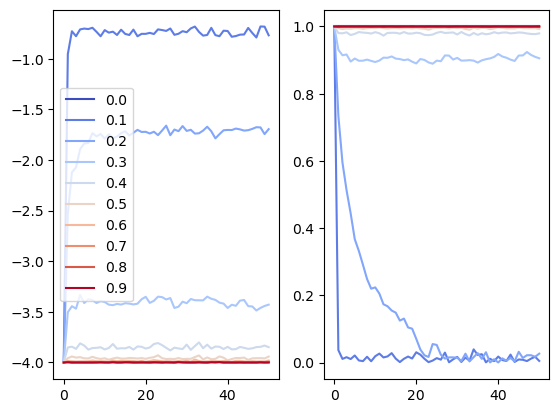

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(6.4, 4.8))

betas = sorted(set(df.beta.value_counts().index))
normalize = plt.Normalize(min(betas), max(betas))
colormap = plt.cm.coolwarm

for beta in betas:
    df_plot = df[df["beta"] == beta]
    # df_hot = df_plot[df_plot["hot"]]
    df_cold = df_plot[df_plot["hot"]==False]
    df_cold = df_cold.sort_values(by="steps", ascending=True)
    
    # Get the color for this beta value using the colormap
    color = colormap(normalize(beta))
    
    # Now use this color for both plots
    ax1.plot(df_cold["steps"], df_cold["energy"], label=f'{beta:.1f}', color=color)
    ax2.plot(df_cold["steps"], df_cold["magnetization_abs"], label=f'{beta:.1f}', color=color)

ax1.legend()

plt.show()